In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

df_tesla = pd.read_csv('./data/search/TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('./data/search/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('./data/search/Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('./data/search/UE Benefits Search vs UE Rate 2004-19.csv')
df_ue_2020 = pd.read_csv('./data/search/UE Benefits Search vs UE Rate 2004-20.csv')

In [104]:
df_tesla.shape

(124, 3)

In [105]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [106]:
df_tesla.TSLA_WEB_SEARCH.idxmax()

123

In [107]:
df_tesla.loc[123]

MONTH              2020-09-01
TSLA_WEB_SEARCH            31
TSLA_USD_CLOSE     407.339996
Name: 123, dtype: object

In [108]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [109]:
df_tesla.TSLA_WEB_SEARCH.max()

31

In [110]:
df_tesla.TSLA_WEB_SEARCH.min()

2

In [111]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [112]:
df_unemployment.shape

(181, 3)

In [113]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [114]:
df_unemployment.UE_BENEFITS_WEB_SEARCH.max()
df_unemployment.UE_BENEFITS_WEB_SEARCH.min()

14

In [115]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [116]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [117]:
df_tesla.isna().values.any()

False

In [118]:
df_unemployment.isna().values.any()

False

In [119]:
df_btc_price.isna().values.sum()

2

In [120]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [121]:
df_btc_price.dropna()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [122]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [123]:
df_unemployment.columns


Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [124]:
df_btc_price.columns


Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [125]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [126]:
df_tesla.MONTH =pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)


In [127]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [128]:
df_btc_price.resample("M", on='DATE').last()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [129]:
df_btc_monthly = df_btc_price.resample("M",on="DATE").mean()

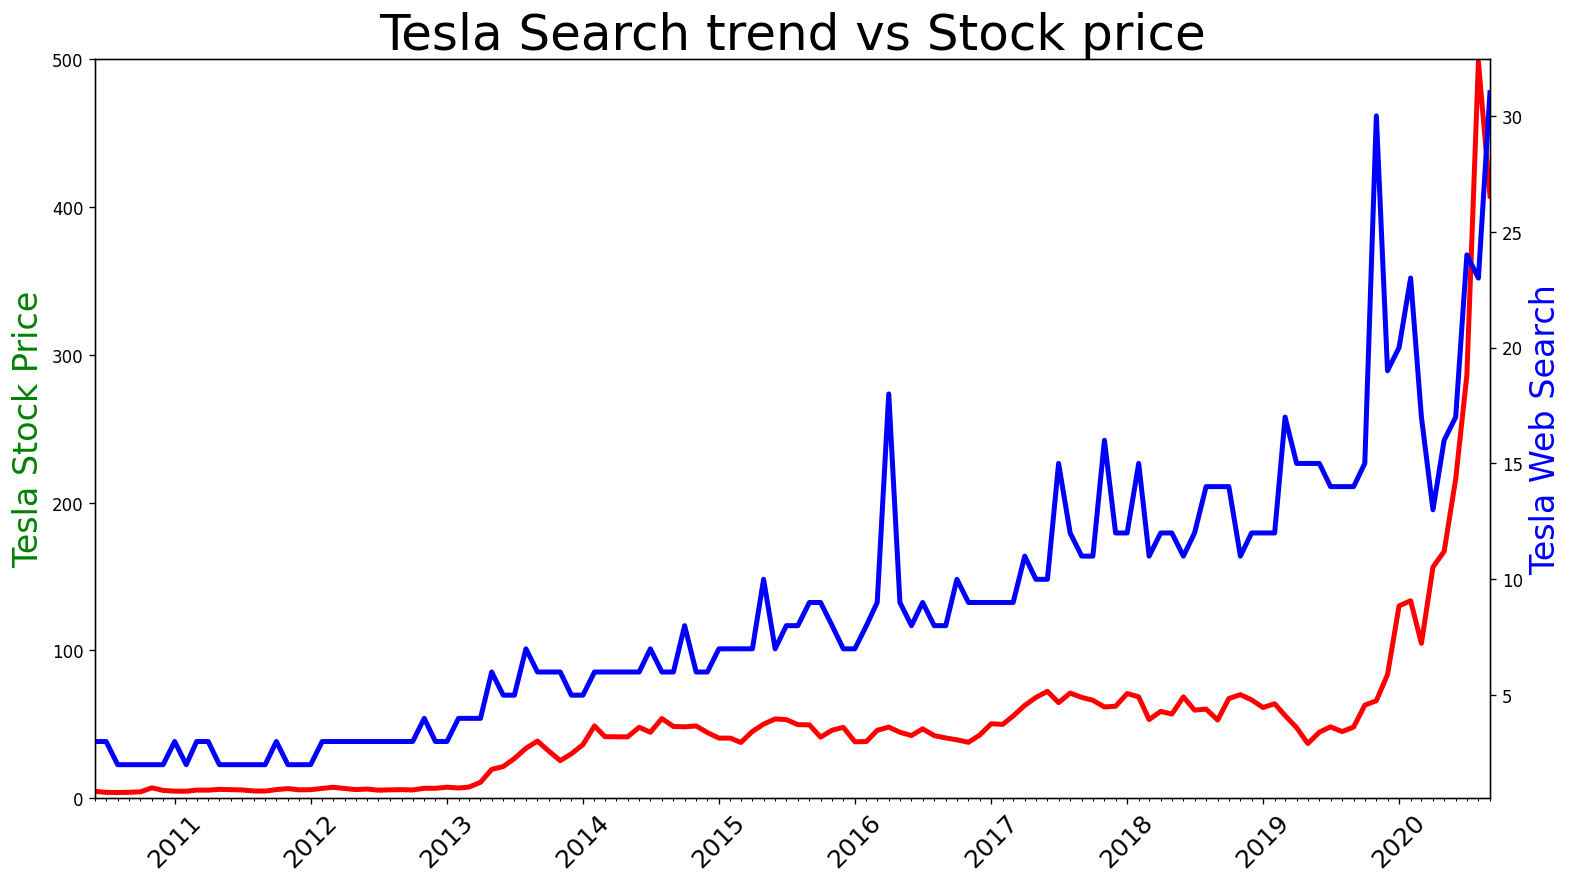

In [130]:
plt.figure(figsize=(15,8), dpi=120)
plt.title("Tesla Search trend vs Stock price", fontsize=30)
plt.xticks(rotation=45, fontsize=15)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0,500])
ax2.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.set_ylabel("Tesla Stock Price", color="green", fontsize=20)
ax2.set_ylabel("Tesla Web Search", color="blue", fontsize=20)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="r", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="b", linewidth=3)


plt.show()

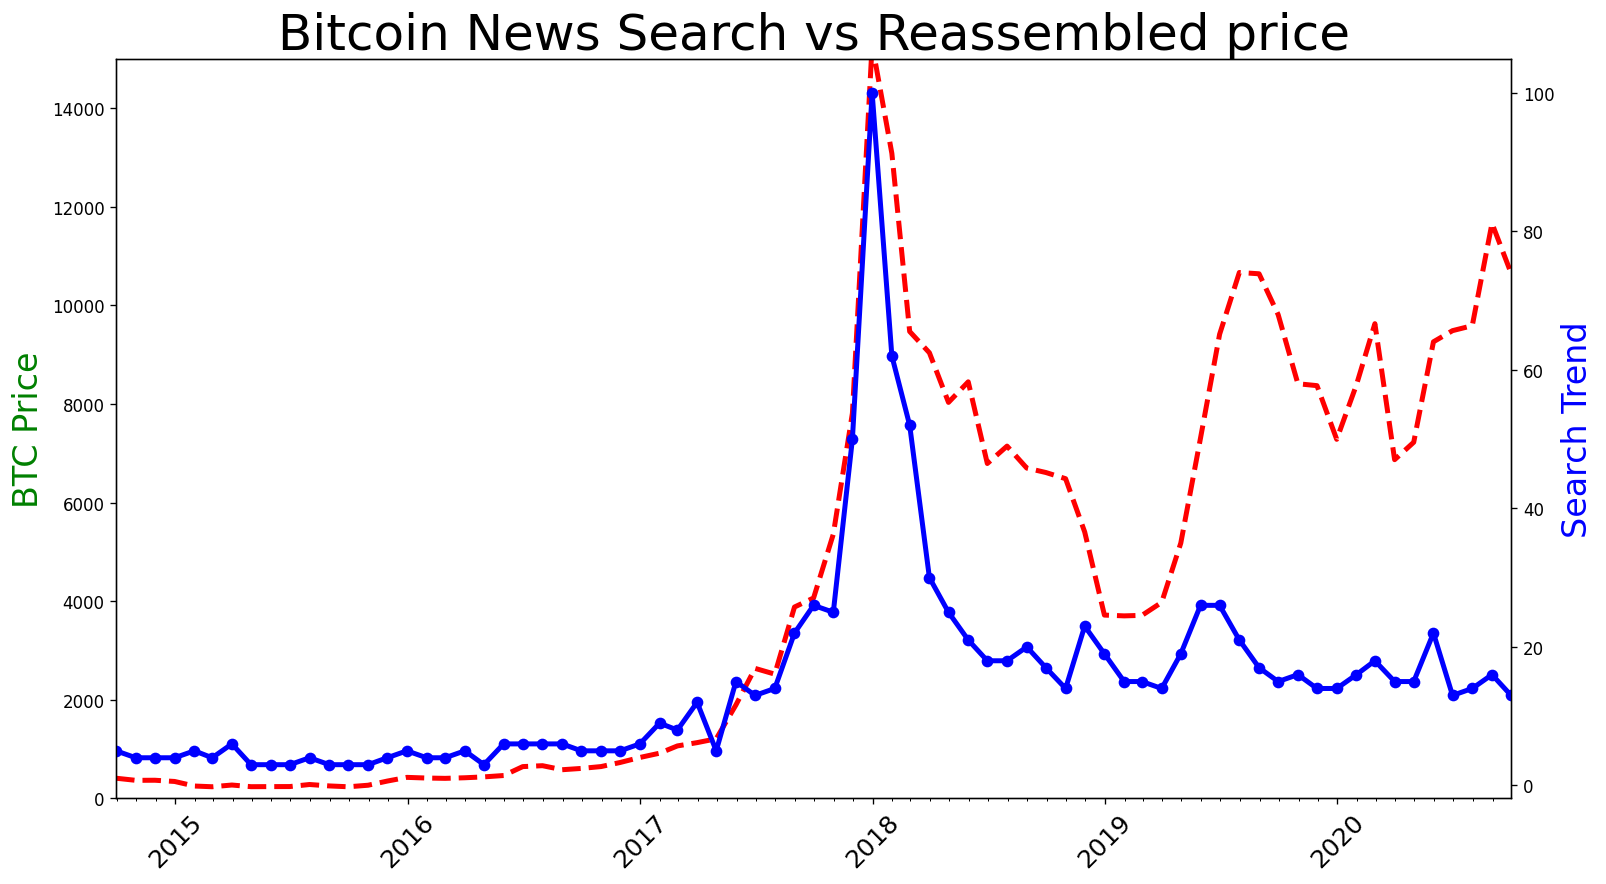

In [131]:
plt.figure(figsize=(15,8), dpi=120)
plt.title("Bitcoin News Search vs Reassembled price", fontsize=30)
plt.xticks(rotation=45, fontsize=15)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0,15000])
ax2.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.set_ylabel("BTC Price", color="green", fontsize=20)
ax2.set_ylabel("Search Trend", color="blue", fontsize=20)

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="r", linewidth=3, linestyle="--")
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color="b", linewidth=3, marker="o")


plt.show()

In [132]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [143]:
roll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH","UNRATE"]].rolling(window=6).mean()

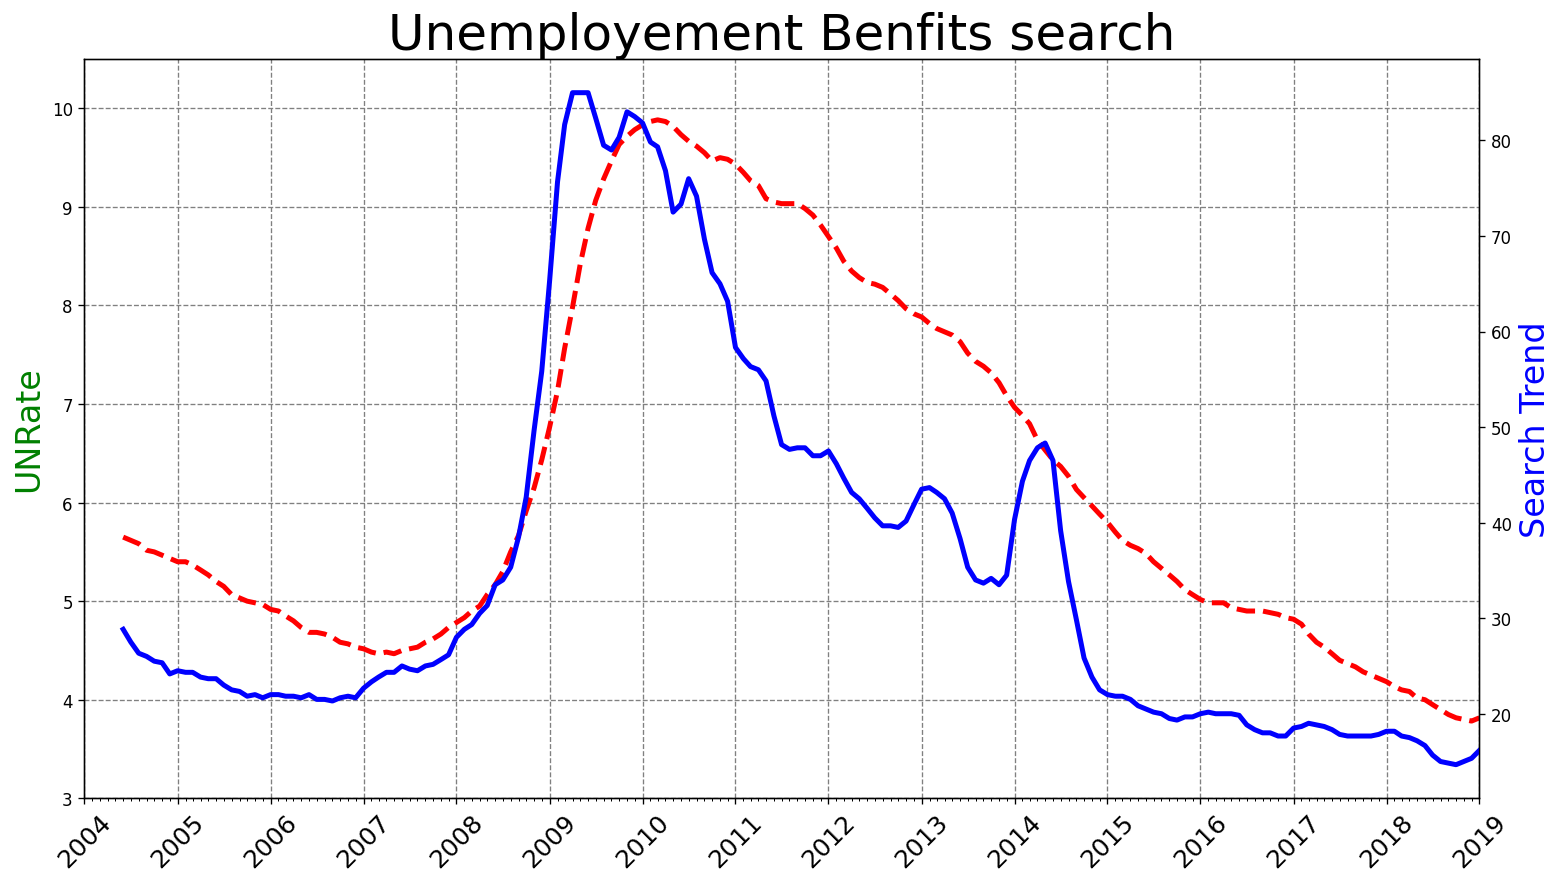

In [144]:
plt.figure(figsize=(15,8), dpi=120)
plt.title("Unemployement Benfits search", fontsize=30)
plt.xticks(rotation=45, fontsize=15)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(linestyle="--", color="gray")

ax1.set_ylim(bottom=3, top=10.5)
ax2.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

ax1.set_ylabel("UNRate", color="green", fontsize=20)
ax2.set_ylabel("Search Trend", color="blue", fontsize=20)

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="r", linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="b", linewidth=3)


plt.show()

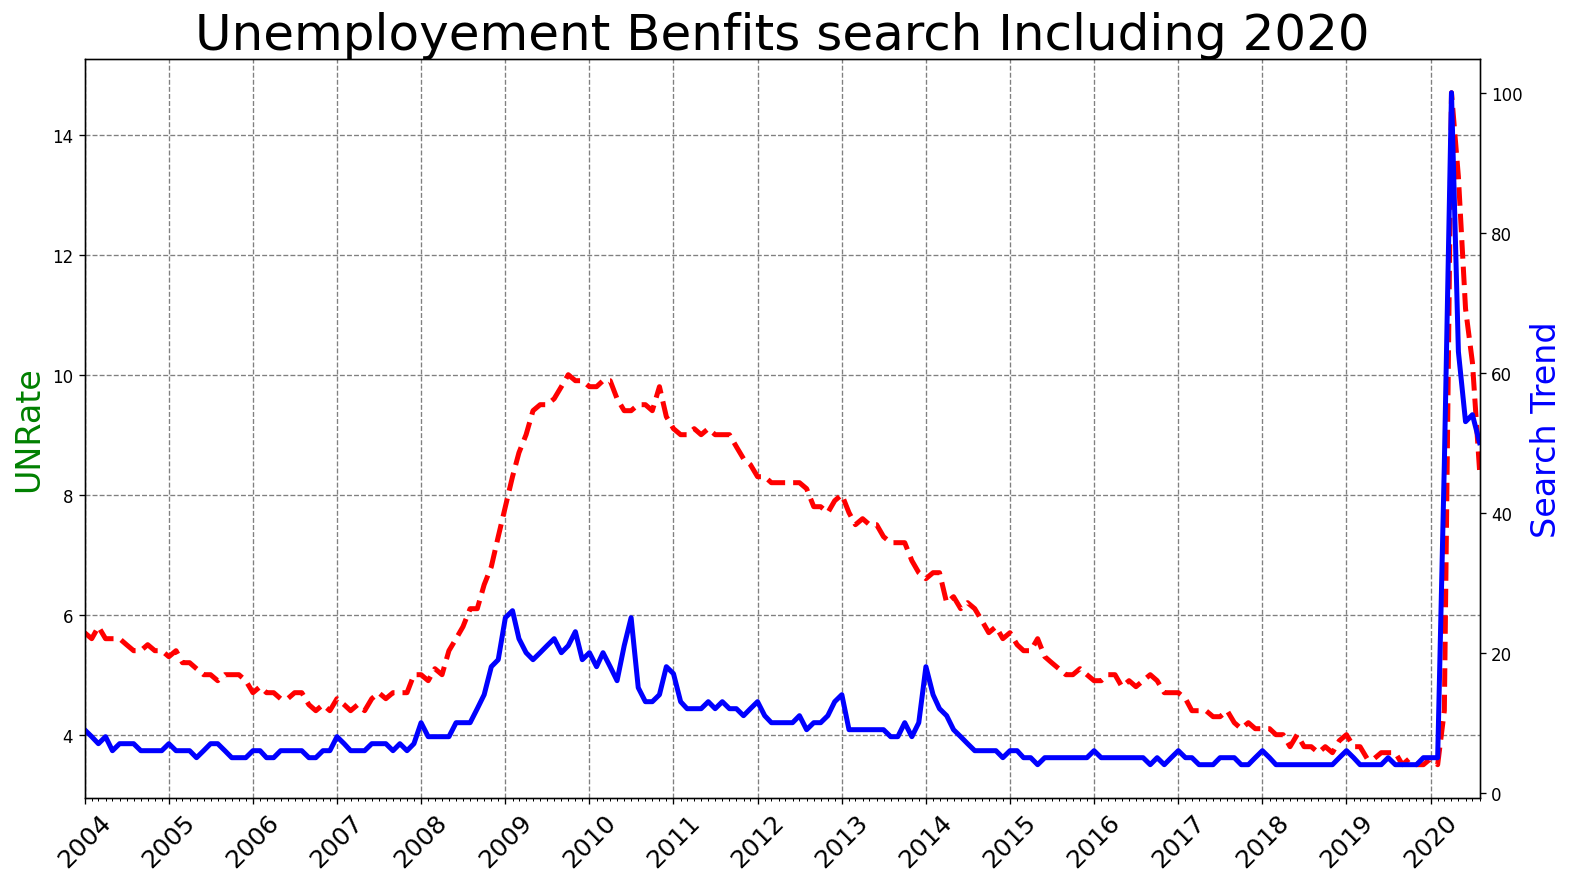

In [148]:
plt.figure(figsize=(15,8), dpi=120)
plt.title("Unemployement Benfits search Including 2020", fontsize=30)
plt.xticks(rotation=45, fontsize=15)

df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(linestyle="--", color="gray")

# ax1.set_ylim(bottom=3, top=10.5)
ax2.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.set_ylabel("UNRate", color="green", fontsize=20)
ax2.set_ylabel("Search Trend", color="blue", fontsize=20)

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color="r", linewidth=3, linestyle="--")
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color="b", linewidth=3)


plt.show()